In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [2]:
#Carga de datos
data_array = np.load ('data_proyecto/proyecto_data/proyecto_training_data.npy') 
data = pd.DataFrame (data_array,columns=["SalePrice","OverallQual","stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"])
data.head(3)

,SalePrice,OverallQual,stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0


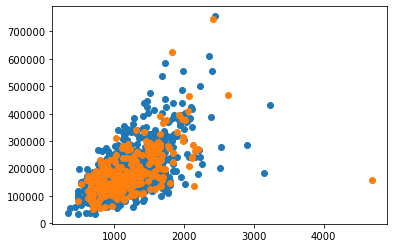

In [36]:
#Dividir dataset en Train and Test
X_train, X_test, y_train, y_test =train_test_split(data_array[:,2],data_array[:,0],test_size = 0.20,shuffle=False)
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)
plt.show()

In [37]:
# Division entre 1000 para reducir tama;o de los valores
X_train=np.reshape(X_train,(-1,1))/1000 # Vector dividido entre 1000 ya que las variables se desvordan por ser valores 
y_train=np.reshape(y_train,(-1,1))/1000 # Vector dividido entre 1000 ya que las variables se desvordan por ser valores muy grandes
X_test=np.reshape(X_test,(-1,1))/1000
y_test=np.reshape(y_test,(-1,1))/1000

### Crear una función para entrenar un modelo de regresión lineal de una variable y = β0 + β1 ∗ x.

In [38]:
def funCosto(x, y, betas):
    x_b=np.hstack([x,np.ones_like(x)])  # Matriz compuesta
    return np.sum(np.square((x_b.dot(betas) - y))) / (2 * len(x))  # Calculo del error

print(funCosto(X_train,y_train,[[134],[25]]))

1925.9796571309928


In [40]:
# Pendiente Vectorizar esta funcion
def funGrad(x, y, theta):
    m=len(x)
    x_b=np.hstack([x,np.ones_like(x)])
    b0_grad=np.sum((x_b.dot(theta) - y)) / (m)
    b1_grad=np.sum(np.transpose((x_b.dot(theta) - y)) * (np.transpose(np.transpose(x_b)[1]))) / (m)
    return b1_grad,b0_grad
print(funGrad(X_train,y_train,[[134],[25]]))

(-0.6429109589041097, -0.6429109589041097)


In [23]:
def DescGrad(x, y, α, epochs):
    hist_cost = []                      # Lista vacia para almacenar el error en cada iteracion
    hist_grad = []                      # Lista vacia para almacenar el gradiente del error
    n_iter = []                         # Lista vacia para almacenar el numero de iteracion correcpondiente al error
    theta = [[0],[0]]            # Inicializacion de los parametros b0 y b1 del modelo
    x_b=np.hstack([x,np.ones_like(x)])  # Matriz compuesta de dos columnas
    hist_theta=[]                       # Lista vacia para almacenar todos los betas
    m=len(x)                            # Longitud del arreglo
    for _ in range(epochs):
         #gradiente del error para b0
        theta[0][0] = theta[0][0] - α * np.sum((x_b.dot(theta) - y)) / (m)
        # Gradiente del error para b1
        theta[1][0] = theta[1][0] - α * np.sum(np.transpose((x_b.dot(theta) - y)) * (np.transpose(np.transpose(x_b)[1]))) / (m)
        hist_theta.append([theta[0][0],theta[1][0]])
        hist_cost.append(funCosto(x, y, theta))
        hist_grad.append(funGrad(x, y,theta))
        n_iter.append(_)

    return theta,np.array(n_iter),np.array(hist_cost),np.array(hist_theta),np.array(hist_grad)

In [35]:
Betas_final, iter_hist,cost_hist, thetas_hist,grad_hist = DescGrad(X_train,y_train, α = 0.7, epochs = 8000)
# Betas_final , Son los b0, b1 que mejor resultado daran
# iter_hist , Array con el historico de iteraciones realizadas
# cost_hist, Array con el error para cada iteracion
# thetas_hist, parametros del modelo b0, b1 actualzados en cada iteracion
# grad_hist, Array con el gradiente del error para cada paramero b0,b1 para cada iteracion
print(thetas_hist[-1])
print(grad_hist[-1])
print(f'Error de la funcion de coto {cost_hist[-1]}')

[134.0787495   25.55185106]
[-9.05211978e-15 -9.05211978e-15]
Error de la funcion de coto 1925.8179299499902


In [9]:
# creacion de diccionario con iteracion y parametros de beta
dic_betas=dict(zip(iter_hist,thetas_hist))

In [10]:
def prediccion(x,thetas_hist):
    x=np.array(x).reshape(-1,1)
    thetas_hist=np.array(thetas_hist).reshape(-1,1)
    x=np.hstack([x,np.ones_like(x)])
    pred=x.dot(thetas_hist)
    return pred

In [11]:
pred_manual=prediccion(X_test,thetas_hist[-1:])[-1:]
#print(thetas_hist[-1:]) # comprobacion del ultimo elemento del array
#print((X_test[-1:]))
#print((y_test[-1:]))

In [12]:
# Funcion para graficar el error
def plot_err(Iter,his_cost):
    plt.plot(Iter,his_cost)
    plt.xlabel('Iteraciones')
    plt.ylabel('Error')
    plt.title("Comportamiento del error en el tiempo")
    plt.show()

In [13]:
# Funcion para graficar como funciona el modelo
def plot_model(betas):
    b=betas[0][0]
    a=betas[1][0]
    plt.scatter(X_train, y_train)
    pred_x = [0, max(X_train)]
    pred_y = [a+b*0, a+b*max(X_train)]
    plt.title('Modelos')
    plt.plot(pred_x, pred_y, "k")


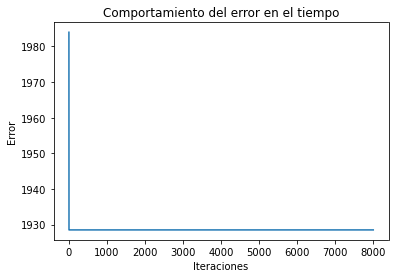

/home/yalicar/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


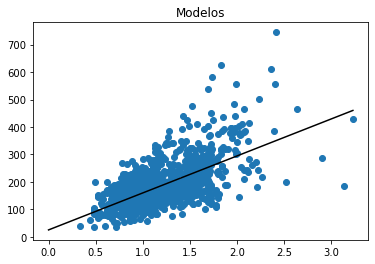

In [14]:
plot_err(iter_hist,cost_hist)
plot_model(Betas_final)

In [15]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(data_array[:,2],data_array[:,0],test_size=0.020,random_state=7)

# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =data_array[:,2].reshape(-1,1)
X_train = np.array(dataX)
y_train = data_array[:,0]/1000
X_test = np.array(dataX)
y_test = data_array[:,0]/1000
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.12450062]
Independent term: 
 36.17344679512132
Mean squared error: 3991.84
Variance score: 0.37


In [16]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression().fit(X_train,y_train)
#print( ln.coef_,ln.intercept_,)
pred_skl=ln.predict(X_test)
#print(y_test)

In [17]:
# media de los dos predicciones
pred_mean=(pred_skl+pred_manual)/2
print(pred_skl[-1:])
print(pred_manual[-1:])
print(pred_mean[-1:])

[192.5462283]
[[182.57062674]]
[[162.65830308 187.93192939 166.64232299 ... 183.32540636 176.47787214
  187.55842752]]


/home/yalicar/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


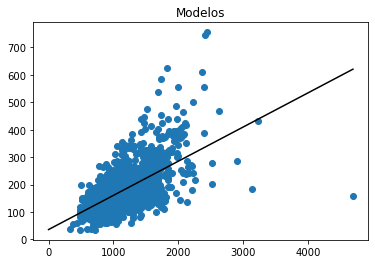

In [18]:
bc=[[ln.coef_],[ln.intercept_]]
plot_model(bc)